In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
## Finding correlation

df.corr()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
Unnamed: 0,1.000000,-8.667781e-01,-4.986939e-01,-0.934555,0.935300,-0.988246
year,-0.866778,1.000000e+00,7.884865e-14,0.882851,-0.877000,0.863232
month,-0.498694,7.884865e-14,1.000000e+00,0.339526,-0.351189,0.481287
interest_rate,-0.934555,8.828507e-01,3.395257e-01,1.000000,-0.925814,0.935793
unemployment_rate,0.935300,-8.769997e-01,-3.511891e-01,-0.925814,1.000000,-0.922338
index_price,-0.988246,8.632321e-01,4.812873e-01,0.935793,-0.922338,1.000000


In [5]:
## drop unnecessary column

df.drop(columns=["Unnamed: 0", "year", "month"], axis=1, inplace=True)

In [6]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
## check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

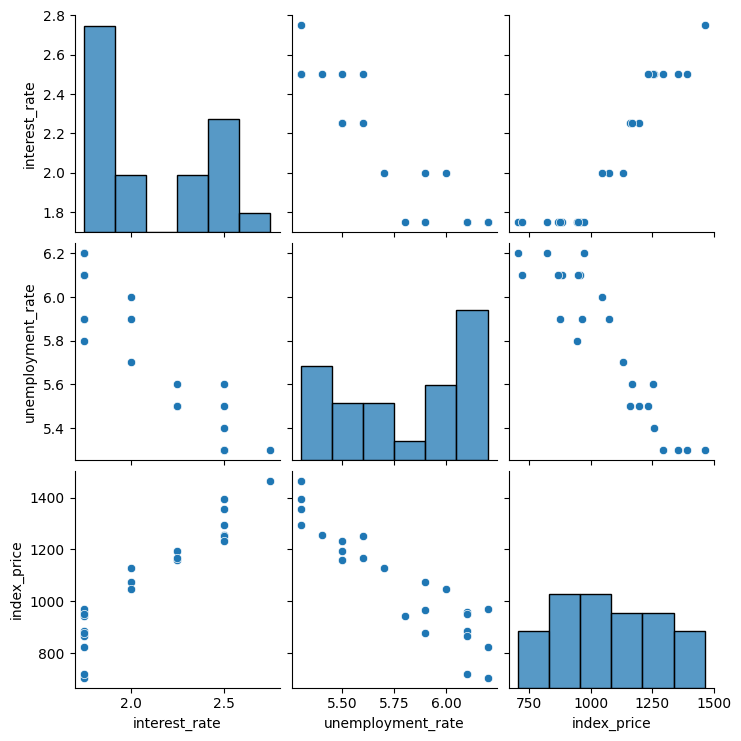

In [8]:
## Visualization
import seaborn as sns
sns.pairplot(df)

In [9]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [13]:
## Get the independent and dependent feature
X = df[['interest_rate','unemployment_rate']]
y = df['index_price']

In [14]:
## another approach
X1 = df.iloc[:, :-1]
y1 = df.iloc[:, -1]

In [16]:
## Training and Test Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

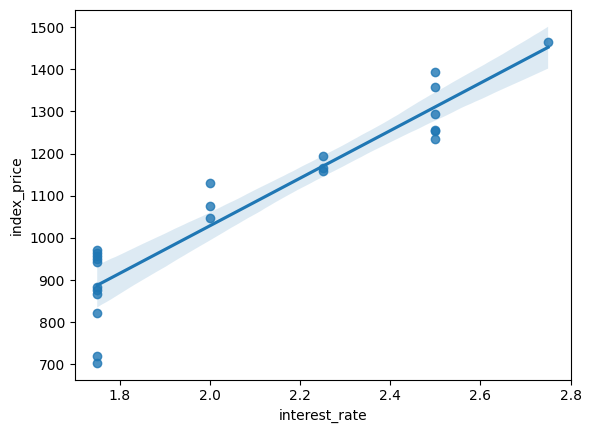

In [25]:
import seaborn as sns

sns.regplot(x=df['interest_rate'], y= df['index_price'])

In [27]:
## Apply standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
## Apply Simple linear Regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [30]:
regression.fit(X_train, y_train)

LinearRegression()

In [32]:
regression.intercept_

np.float64(1053.4444444444443)

In [33]:
## Cross validation
from sklearn.model_selection import cross_val_score

validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [34]:
validation_score

array([-1861.74046551, -8715.8459466 , -7707.52362191, -9169.13776461,
        -791.32842311])

In [35]:
## prediction

y_prediction = regression.predict(X_test)

In [36]:
y_prediction

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [37]:
## performance matrics

from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_prediction)
mae = mean_absolute_error(y_test, y_prediction)
rmse = np.sqrt(mse)

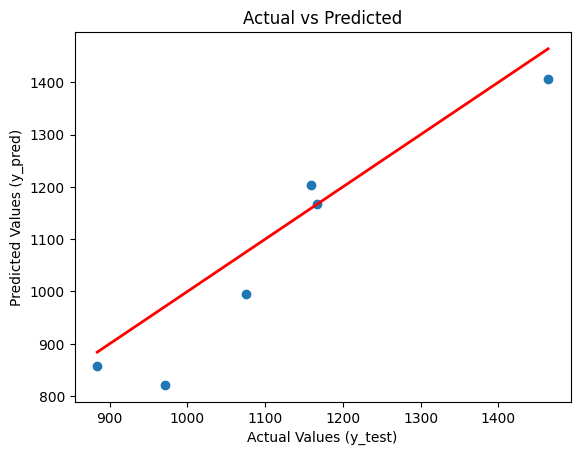

In [38]:
plt.scatter(y_test, y_prediction)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # perfect prediction line
plt.show()